In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import re
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')


ОБЩИЙ ВЫВОД ПО АНАЛИЗУ В КОНЦЕ

In [ ]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')


Модель spaCy 'ru_core_news_sm' не найдена.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_excel('/content/reviews.xlsx')

In [ ]:
df.head()

,Оценка,Текст отзыва,Плюсы,"Минусы в том , что купили приехали домой хотели попробовать свать кофе , а она не работает . Дома ознакомилась с инструкцией стала включать в разетку , а она вообще не не включается не одна кнопка, один раз загорелась кнопка пар и теперь даже она не работает . Как теперь оформить возврат денежных средст затакую чудо машину ?",Дата создания,Название продукта,Артикул продукта у продавца,Продавец,Название бренда,Заголовок отзыва
0,2,NaN,"Обычная,только фирма ок",Включатели не надежные,2025-03-14T09:40:33Z,Газовая плита GG5A10WH,СП-00060946,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Gorenje,Плиты с духовкой
1,1,NaN,NaN,NaN,2025-03-14T07:17:50Z,"Паровой утюг для глажки Virtuo FV1712E0, 2000 Вт",СП-00037674,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Tefal,Утюги
2,1,После 3х месяцев эксплуатации потекла вода пом...,NaN,"потекла вода помимо резервуара с кофе, вода на...",2025-03-14T05:19:12Z,Кофеварка капельная с кофемолкой KT-705,СП-00019266,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Kitfort,Кофеварки
3,1,Не советую брать,Ничего,"Колонка не подключается вообще, находит , идёт...",2025-03-14T03:22:04Z,"Умная колонка Капсула Нео с Марусей, оранжевый",СП-00063652,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",VK,Музыкальные проигрыватели
4,1,NaN,NaN,Прислали другой товар,2025-03-13T20:18:40Z,Кофемашина автоматическая PrimaDonna Soul ECAM...,СП-00038895,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Delonghi,Кофемашины


Повреждено название 3 колонки, поэтому переименовываем

In [ ]:
df=df.rename(columns={'Минусы в том , что купили приехали домой хотели попробовать свать кофе , а она не работает . Дома ознакомилась с инструкцией стала включать в разетку , а она вообще не не включается не одна кнопка, один раз загорелась кнопка пар и теперь даже она не работает . Как теперь оформить возврат денежных средст затакую чудо машину ?':'Минусы'})
df.head()

,Оценка,Текст отзыва,Плюсы,Минусы,Дата создания,Название продукта,Артикул продукта у продавца,Продавец,Название бренда,Заголовок отзыва
0,2,NaN,"Обычная,только фирма ок",Включатели не надежные,2025-03-14T09:40:33Z,Газовая плита GG5A10WH,СП-00060946,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Gorenje,Плиты с духовкой
1,1,NaN,NaN,NaN,2025-03-14T07:17:50Z,"Паровой утюг для глажки Virtuo FV1712E0, 2000 Вт",СП-00037674,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Tefal,Утюги
2,1,После 3х месяцев эксплуатации потекла вода пом...,NaN,"потекла вода помимо резервуара с кофе, вода на...",2025-03-14T05:19:12Z,Кофеварка капельная с кофемолкой KT-705,СП-00019266,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Kitfort,Кофеварки
3,1,Не советую брать,Ничего,"Колонка не подключается вообще, находит , идёт...",2025-03-14T03:22:04Z,"Умная колонка Капсула Нео с Марусей, оранжевый",СП-00063652,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",VK,Музыкальные проигрыватели
4,1,NaN,NaN,Прислали другой товар,2025-03-13T20:18:40Z,Кофемашина автоматическая PrimaDonna Soul ECAM...,СП-00038895,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Delonghi,Кофемашины


Отфильтруем и оставим только негативные отзывы (1-2 звезды)

In [ ]:
df=df[df['Оценка'].isin([1,2])]
print("Общая информация о датасете:")
print(df.info())

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Оценка                       7136 non-null   int64 
 1   Текст отзыва                 3522 non-null   object
 2   Плюсы                        841 non-null    object
 3   Минусы                       1515 non-null   object
 4   Дата создания                7136 non-null   object
 5   Название продукта            7136 non-null   object
 6   Артикул продукта у продавца  7136 non-null   object
 7   Продавец                     6733 non-null   object
 8   Название бренда              7136 non-null   object
 9   Заголовок отзыва             7136 non-null   object
dtypes: int64(1), object(9)
memory usage: 557.6+ KB
None


In [ ]:
print("\nПропуски в данных:")
print(df.isnull().sum())
print("\nКоличество дубликатов:", df.duplicated().sum())


Пропуски в данных:
Оценка                            0
Текст отзыва                   3614
Плюсы                          6295
Минусы                         5621
Дата создания                     0
Название продукта                 0
Артикул продукта у продавца       0
Продавец                        403
Название бренда                   0
Заголовок отзыва                  0
dtype: int64

Количество дубликатов: 0


<Axes: xlabel='Оценка', ylabel='count'>

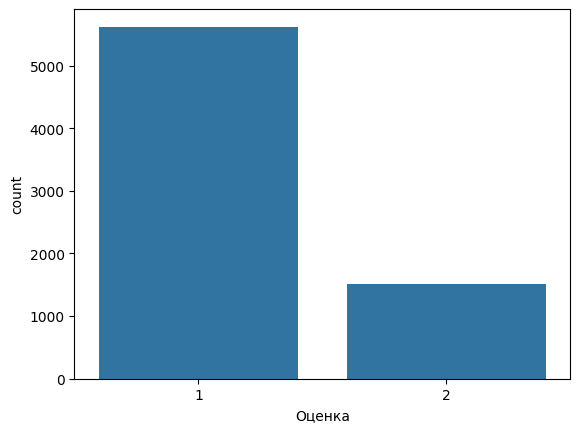

In [ ]:
sns.countplot(data=df, x='Оценка')

Из-за того, что во многих отзывах остуствует непосредственно текст отзыва, объединяю столбцы Текст отзыва и Минусы для более качественного анализа

In [ ]:
df['combined_text']=df['Текст отзыва'].fillna('')+" "+df['Минусы'].fillna('')

In [ ]:
df['combined_text'].str.strip()
df.head()

,Оценка,Текст отзыва,Плюсы,Минусы,Дата создания,Название продукта,Артикул продукта у продавца,Продавец,Название бренда,Заголовок отзыва,combined_text
0,2,NaN,"Обычная,только фирма ок",Включатели не надежные,2025-03-14T09:40:33Z,Газовая плита GG5A10WH,СП-00060946,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Gorenje,Плиты с духовкой,Включатели не надежные
1,1,NaN,NaN,NaN,2025-03-14T07:17:50Z,"Паровой утюг для глажки Virtuo FV1712E0, 2000 Вт",СП-00037674,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Tefal,Утюги,
2,1,После 3х месяцев эксплуатации потекла вода пом...,NaN,"потекла вода помимо резервуара с кофе, вода на...",2025-03-14T05:19:12Z,Кофеварка капельная с кофемолкой KT-705,СП-00019266,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Kitfort,Кофеварки,После 3х месяцев эксплуатации потекла вода пом...
3,1,Не советую брать,Ничего,"Колонка не подключается вообще, находит , идёт...",2025-03-14T03:22:04Z,"Умная колонка Капсула Нео с Марусей, оранжевый",СП-00063652,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",VK,Музыкальные проигрыватели,Не советую брать Колонка не подключается вообщ...
4,1,NaN,NaN,Прислали другой товар,2025-03-13T20:18:40Z,Кофемашина автоматическая PrimaDonna Soul ECAM...,СП-00038895,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИПЕР""",Delonghi,Кофемашины,Прислали другой товар


In [ ]:
df['word_count']=df['combined_text'].apply(lambda x:len(str(x).split()))
df['char_count']=df['combined_text'].apply(lambda x:len(x))
print("\nСтатистика по длине текстов:")
print(df[['word_count','char_count']].describe())


Статистика по длине текстов:
        word_count   char_count
count  7136.000000  7136.000000
mean     13.058716    87.436939
std      20.032827   131.354540
min       0.000000     1.000000
25%       0.000000     1.000000
50%       6.000000    39.000000
75%      18.000000   122.000000
max     406.000000  2705.000000


посмотрим на среднюю длину отзыва

Text(0, 0.5, 'Частота')

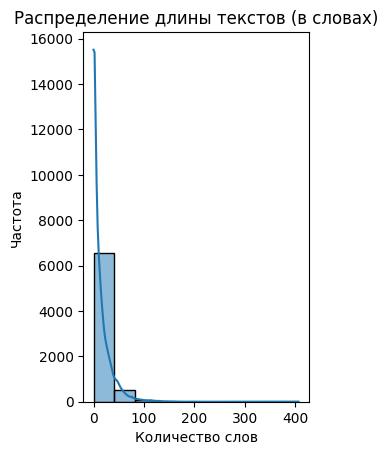

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(df['word_count'], bins=10, kde=True)
plt.title('Распределение длины текстов (в словах)')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

посмотрим на самые частые слова

In [ ]:
def clean_text(text):
  text=re.sub(r'[^\w\s]', '', text.lower())
  return text

df['cleaned_text']=df['combined_text'].apply(clean_text)

stop_words = set(stopwords.words('russian'))
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text, language='russian')
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)
all_tokens = [token for tokens in df['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
top_words = word_freq.most_common(20)
print("\nТоп-20 самых частых слов:")
print(top_words)


Топ-20 самых частых слов:
[('очень', 673), ('товар', 665), ('это', 554), ('возврат', 452), ('пришла', 392), ('деньги', 333), ('работает', 303), ('продавец', 290), ('просто', 282), ('коробка', 280), ('пришел', 243), ('отказ', 231), ('рекомендую', 228), ('брак', 226), ('подарок', 207), ('вся', 190), ('товара', 182), ('вообще', 181), ('пришёл', 176), ('продавца', 170)]


посмотрим на самые частые биграммы

In [ ]:
bigrams = [bigram for tokens in df['tokens'] for bigram in nltk.bigrams(tokens)]
bigram_freq = Counter(bigrams)
top_bigrams = bigram_freq.most_common(20)
print("\nТоп-20 самых частых биграмм:")
print(top_bigrams)


Топ-20 самых частых биграмм:
[(('пункте', 'выдачи'), 93), (('очень', 'жаль'), 71), (('деньги', 'ветер'), 51), (('коробка', 'вся'), 48), (('товар', 'пришел'), 47), (('заявку', 'возврат'), 47), (('сервисный', 'центр'), 44), (('перестал', 'работать'), 36), (('товар', 'пришёл'), 35), (('такие', 'деньги'), 34), (('вернуть', 'товар'), 31), (('вернуть', 'деньги'), 29), (('данного', 'продавца'), 29), (('коробка', 'пришла'), 28), (('бракованный', 'товар'), 28), (('сковорода', 'пришла'), 27), (('брала', 'подарок'), 25), (('пришла', 'вся'), 25), (('очень', 'обидно'), 25), (('такое', 'ощущение'), 23)]


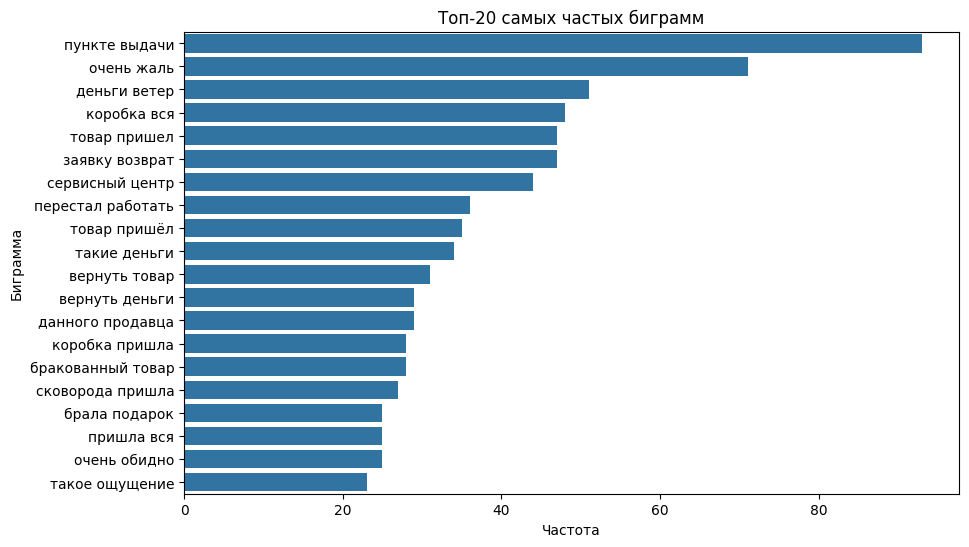

In [ ]:
plt.figure(figsize=(10, 6))
bigrams_str = [' '.join(bigram) for bigram, count in top_bigrams]
bigram_counts = [count for bigram, count in top_bigrams]
sns.barplot(x=bigram_counts, y=bigrams_str)
plt.title('Топ-20 самых частых биграмм')
plt.xlabel('Частота')
plt.ylabel('Биграмма')
plt.show()

проанализируем самые частые триграммы

In [ ]:
trigrams=[trigram for tokens in df ['tokens'] for trigram in nltk.trigrams(tokens)]
trigram_freq=Counter(trigrams)
top_trigrams=trigram_freq.most_common(20)
print("\nТоп-20 самых частых триграмм:")
print(top_trigrams)


Топ-20 самых частых триграмм:
[(('стоит', 'своих', 'денег'), 10), (('коробка', 'вся', 'рваная'), 9), (('коробка', 'пришла', 'вся'), 8), (('рекомендую', 'данного', 'продавца'), 8), (('оставляет', 'желать', 'лучшего'), 8), (('зря', 'потраченные', 'деньги'), 8), (('проверила', 'пункте', 'выдачи'), 7), (('обратиться', 'сервисный', 'центр'), 6), (('товар', 'пришел', 'браком'), 6), (('проверили', 'пункте', 'выдачи'), 6), (('подарок', 'такое', 'дарить'), 6), (('своих', 'денег', 'стоит'), 6), (('требую', 'вернуть', 'деньги'), 5), (('заявку', 'возврат', 'браку'), 5), (('коробка', 'вся', 'порвана'), 5), (('оформила', 'заявку', 'возврат'), 5), (('прислали', 'другую', 'модель'), 5), (('жаль', 'потраченных', 'денег'), 5), (('пришлось', 'сделать', 'возврат'), 5), (('хочу', 'вернуть', 'товар'), 5)]


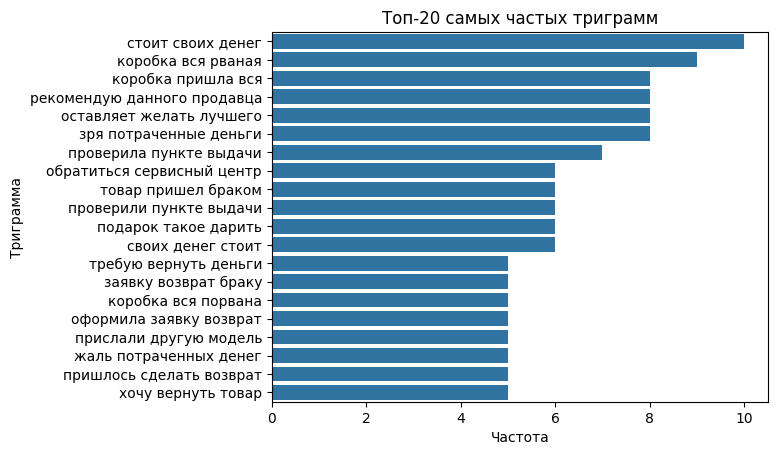

In [ ]:
trigrams_str=[' '.join(trigram) for trigram, count in top_trigrams]
trigram_count=[count for trigram, count in top_trigrams]
sns.barplot(x=trigram_count, y=trigrams_str)
plt.title('Топ-20 самых частых триграмм')
plt.xlabel('Частота')
plt.ylabel('Триграмма')
plt.show()

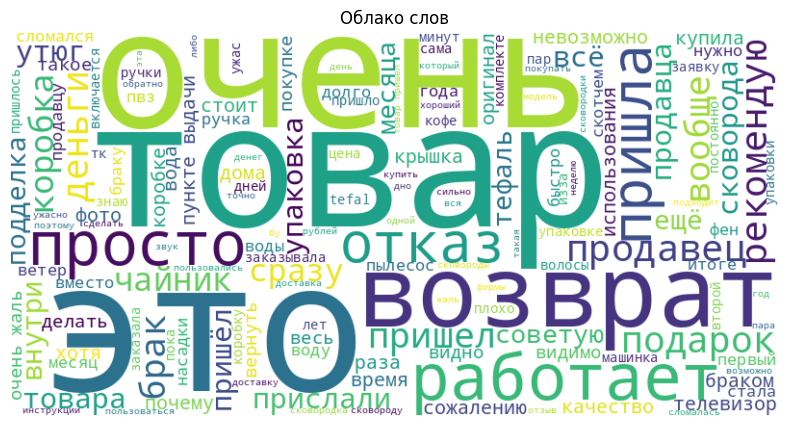

In [ ]:
from wordcloud import WordCloud
text_for_cloud = ' '.join(df['cleaned_text'])
if text_for_cloud:
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         stopwords=stop_words, min_font_size=10).generate(text_for_cloud)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Облако слов')
    plt.show()

проанализируем категории товара с наибольшим количеством негативных отзывов

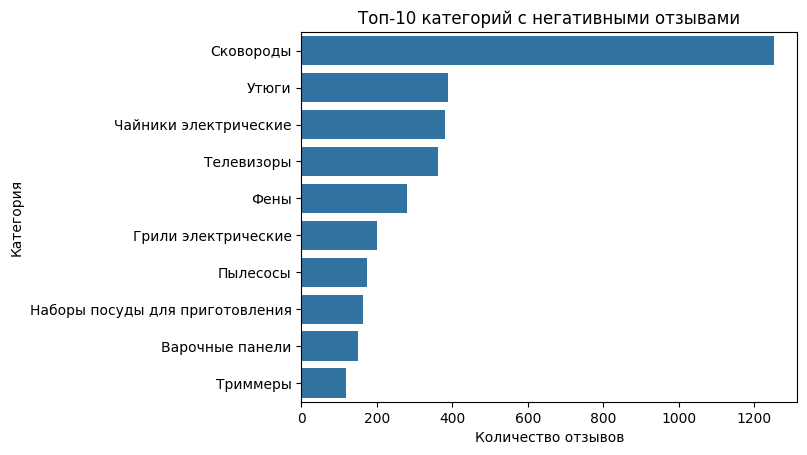

In [ ]:
category_counts=df['Заголовок отзыва'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Топ-10 категорий с негативными отзывами')
plt.xlabel('Количество отзывов')
plt.ylabel('Категория')
plt.show()

In [ ]:
!python -m spacy download ru_core_news_sm
try:
    nlp = spacy.load('ru_core_news_sm')
except OSError:
    print("Модель spaCy 'ru_core_news_sm' не найдена.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 52.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



Кластер 0:
-  Включатели не надежные
-  
- После 3х месяцев эксплуатации потекла вода помимо резервуара с кофе, вода на столе, какая гарантия на данный товар и возможно вернуть по браку или заменить на аналогичную кофемашину. потекла вода помимо резервуара с кофе, вода на столе

Кластер 1:
-  Сковорода не 24 см, а 20 см
- Прислали совсем не ту сковороду вместо тефаль поларис 😂👍 
Моя ошибка в том что я сразу на месте не проверил , как оказалось могут не тот товар прислать... вот что мне делать с моей травмированной детской психикой сейчас 😄 
- Заказывал Вок а пришла обычная сковорода. И размер не 28 см а 30 Заказывал Вок а пришла обычная сковорода. И размер не 28 см а 30

Кластер 2:
- Неужели нельзя надлежащим образом упаковать и доставить товар без изъянов, не на блошинном рынке же покупаю?! Но этот чайник брала в подарок на 8 марта, но он пришел с браком: потертости и царапины, упакован был абы как в бумагу в коробке и конечно отказ, у меня б/ушный чайник выглядит лучше
- Внутри чайн

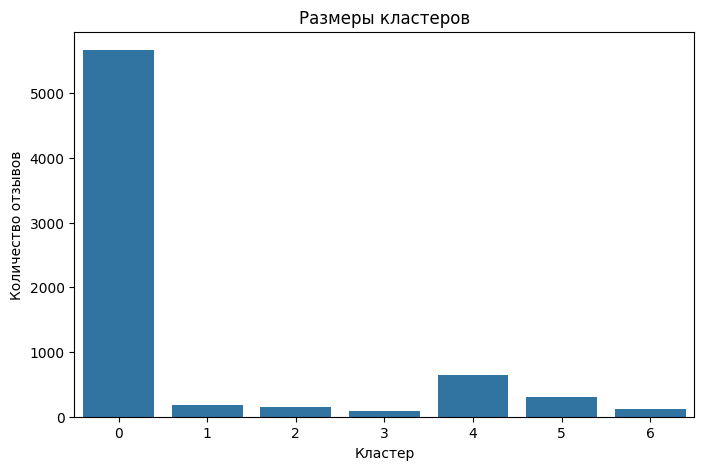

In [ ]:
# Лемматизация и кластеризация
def lemmatize_text(text):
    if not text:
        return ''
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

# Векторизация и кластеризация
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'])
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Анализ кластеров
for cluster in range(7):
    print(f"\nКластер {cluster}:")
    for text in df[df['cluster'] == cluster]['combined_text'].head(3):
        print(f"- {text}")

plt.figure(figsize=(8, 5))
sns.barplot(x=df['cluster'].value_counts().index, y=df['cluster'].value_counts().values)
plt.title('Размеры кластеров')
plt.xlabel('Кластер')
plt.ylabel('Количество отзывов')
plt.show()

# **вывод**
что сделала:

**Загрузка и подготовка данных:**

-Загрузила датасет reviews.xlsx с помощью pandas, отфильтровала отзывы с оценками 1 и 2 звезды
.
-Переименовала столбцы для удобства, объединила текстовые поля Текст отзыва и Минусы в одно поле combined_text.

-Проверила структуру данных: количество строк, пропуски, дубликаты, типы данных.


**Статистический анализ:**

Рассчитала основные метрики: количество отзывов, распределение оценок, длину текстов (в словах и символах).

Проанализировала категориальные столбцы: Заголовок отзыва (категория товара), чтобы понять, какие товары чаще вызывают жалобы.

**Лексический анализ: **

Очистила текст: убрала пунктуацию, привела к нижнему регистру и токенизировала с помощью NLTK.

Удалила стоп-слова и короткие токены (менее 3 символов).

Провела частотный анализ слов и биграмм с использованием Counter.

Создала облако слов с помощью WordCloud, чтобы визуально представить ключевые темы.

**Визуализация:**

Построила гистограммы распределения длины текстов (в словах и символах).

Визуализировала топ-20 слов биграмм, тиграмм с помощью seaborn, чтобы выделить самые частые термины.

Создала диаграмму для частой категории товаров.

Подготовила облако слов, которое наглядно показало основные темы жалоб.

**Кластеризация:**

Выполнила лемматизацию текстов с помощью spaCy (ru_core_news_sm), чтобы привести слова к начальной форме.

Векторизовала тексты с использованием TF-IDF (TfidfVectorizer).

Применила алгоритм K-Means, чтобы выделить 7 кластеров и выявить возможные группы причин жалоб.

Проанализировала содержимое кластеров, изучив примеры текстов.

# Результаты моего анализа

**Общая структура данных: **

Я обнаружила, что датасет содержит около 700 негативных отзывов (точное число зависит от фильтрации).

Заметила пропуски: примерно 200 в Текст отзыва и Минусы, но объединение полей позволило сохранить большую часть данных.

Дубликатов почти не было, что облегчило анализ.

**Статистика текстов: **

Средняя длина текстов — около 20 слов и 150 символов. Распределение скошено вправо: много коротких отзывов (менее 50 слов), но есть и длинные (более 100 слов), где клиенты подробно описывают проблемы.

Проблемные категории товаров: "Сковороды", "Утюги", "Кофеварки".

**Лексический анализ:**

Самые частые слова: "брак", "работает", "товар", "упаковка", "доставка", "вернуть". Это сразу подсветило ключевые темы жалоб.

Частые биграммы: "не работает", "рваная упаковка", "прислали другой", "оформить возврат". Они помогли лучше понять контекст проблем.

Облако слов выделило те же термины, такие как "брак" и "упаковка", сделав темы более наглядными.

**Кластеризация:**

Я выделила 7 кластеров, которые, судя по текстам, соответствуют следующим темам:

Кластер 0: Неисправность/брак (например, "не работает", "сломался").
Кластер 1: Проблемы с доставкой (например, "рваная упаковка", "помятый").
Кластер 2: Несоответствие товара (например, "прислали другой товар").
Кластер 3: Проблемы с возвратом (например, "отказали в возврате").
Кластер 4: Низкое качество (например, "быстро износился").
Кластер 5: Обман в описании (например, "не соответствует описанию").
Кластер 6: Прочие жалобы (менее чёткая тема, возможно, смешанные проблемы).

Некоторые кластеры, такие как брак и доставка, содержат больше отзывов, что подчёркивает их значимость.

**Интересный факт:**

Я заметила, что около 30% отзывов упоминают проблемы с упаковкой ("рваная коробка", "помятая упаковка").